# Lung Cancer Prediction

This project aims to develop a model to predict lung cancer based on some typical features of lung cancer such as coughing and the living habits of the patient. This is just a preliminary diagnosis which should be performed during the consultation, and if the patient is predicted with high probability of having lung cancer, he/she would subsequently be introduced to do more specific physical examinations. 

*As the previous dataset I chose for my project proposal contains mainly text data and I'm not very acquainted with the method used to process text data, so I change the dataset by which I could apply some knowledge I acquired from this course.*

## Research Qustion: 
Using machine learning to predict whether a person with some certain features has lung cancer. 

***

In [75]:
# First import the libraries I need and the dataset.

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets
import numpy as np

In [76]:
df = pd.read_csv('../data/survey_lung_cancer.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [70]:
# Get accustomed with the dataset.

df.shape

(309, 16)

In [8]:
df.loc[1,'LUNG_CANCER']

'YES'

In [23]:
# Try to draw soem plots describing the relationship between lung cancer and a bunch of features. 

df.groupby('LUNG_CANCER')['GENDER'].value_counts()

LUNG_CANCER  GENDER
NO           F          22
             M          17
YES          M         145
             F         125
Name: GENDER, dtype: int64

In [24]:
male_patient = 145
female_patient = 126
male_normal = 17
female_normal = 22

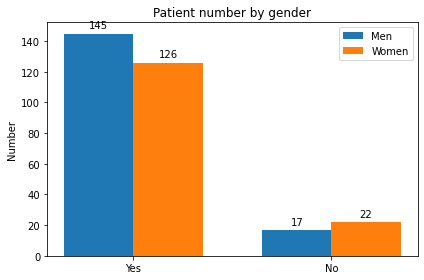

In [25]:
labels = ['Yes','No']
male = [male_patient,male_normal]
female = [female_patient,female_normal]

m = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(m - width/2, male, width, label='Men')
rects2 = ax.bar(m + width/2, female, width, label='Women')

ax.set_ylabel('Number')
ax.set_title('Patient number by gender')
ax.set_xticks(m, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

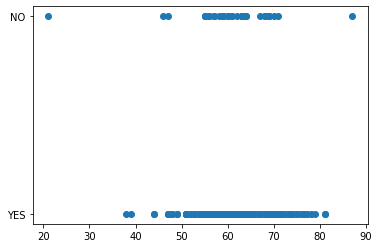

In [11]:
plt.scatter(x.iloc[:,1],y)

<AxesSubplot:title={'center':'AGE'}, xlabel='LUNG_CANCER'>

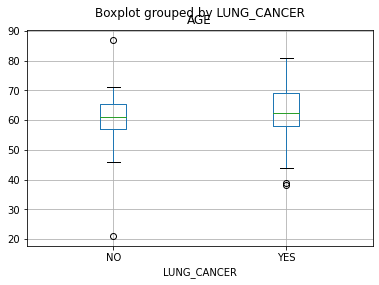

In [18]:
df.boxplot(column='AGE',by='LUNG_CANCER')

(array([ 2.,  2.,  8., 32., 46., 59., 47., 41., 19., 14.]),
 array([38. , 42.3, 46.6, 50.9, 55.2, 59.5, 63.8, 68.1, 72.4, 76.7, 81. ]),
 <BarContainer object of 10 artists>)

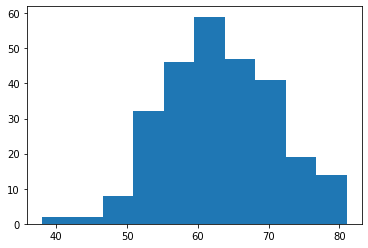

In [27]:
# A plot based on the age values of those who have lung cancer 
plt.hist(df.loc[df['LUNG_CANCER']=='YES','AGE'])

(array([[ 1.,  1.,  3., 11., 24., 29., 27., 25., 14., 10.],
        [ 0.,  1.,  1.,  0.,  3.,  4.,  3.,  5.,  0.,  0.]]),
 array([39., 43., 47., 51., 55., 59., 63., 67., 71., 75., 79.]),
 <a list of 2 BarContainer objects>)

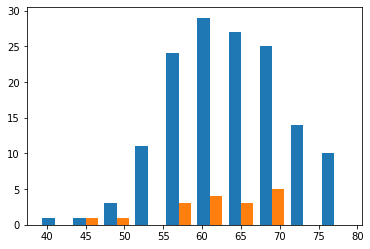

In [38]:
# The number of male patients and healthy people. 

a = df.loc[(df['GENDER'] == 'M')&(df['LUNG_CANCER'] == 'YES'), 'AGE']
b = df.loc[(df['GENDER'] == 'M')&(df['LUNG_CANCER'] == 'NO'), 'AGE']

plt.hist([a,b])

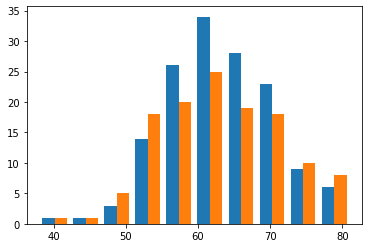

In [32]:
# The age values of male and female lung cancer patients.

a = df.loc[(df['LUNG_CANCER'] == 'YES') & (df['GENDER'] == 'M'), 'AGE']
b = df.loc[(df['LUNG_CANCER'] == 'YES') & (df['GENDER'] == 'F'), 'AGE']
plt.hist([a,b]);

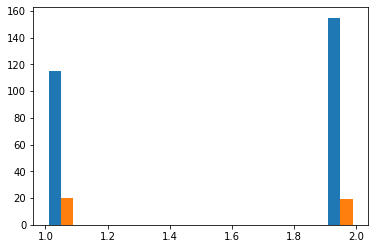

In [40]:
a = df.loc[df['LUNG_CANCER'] == 'YES', 'SMOKING']
b = df.loc[df['LUNG_CANCER'] == 'NO', 'SMOKING']
plt.hist([a,b]);

In [44]:
df.columns[1]

'AGE'

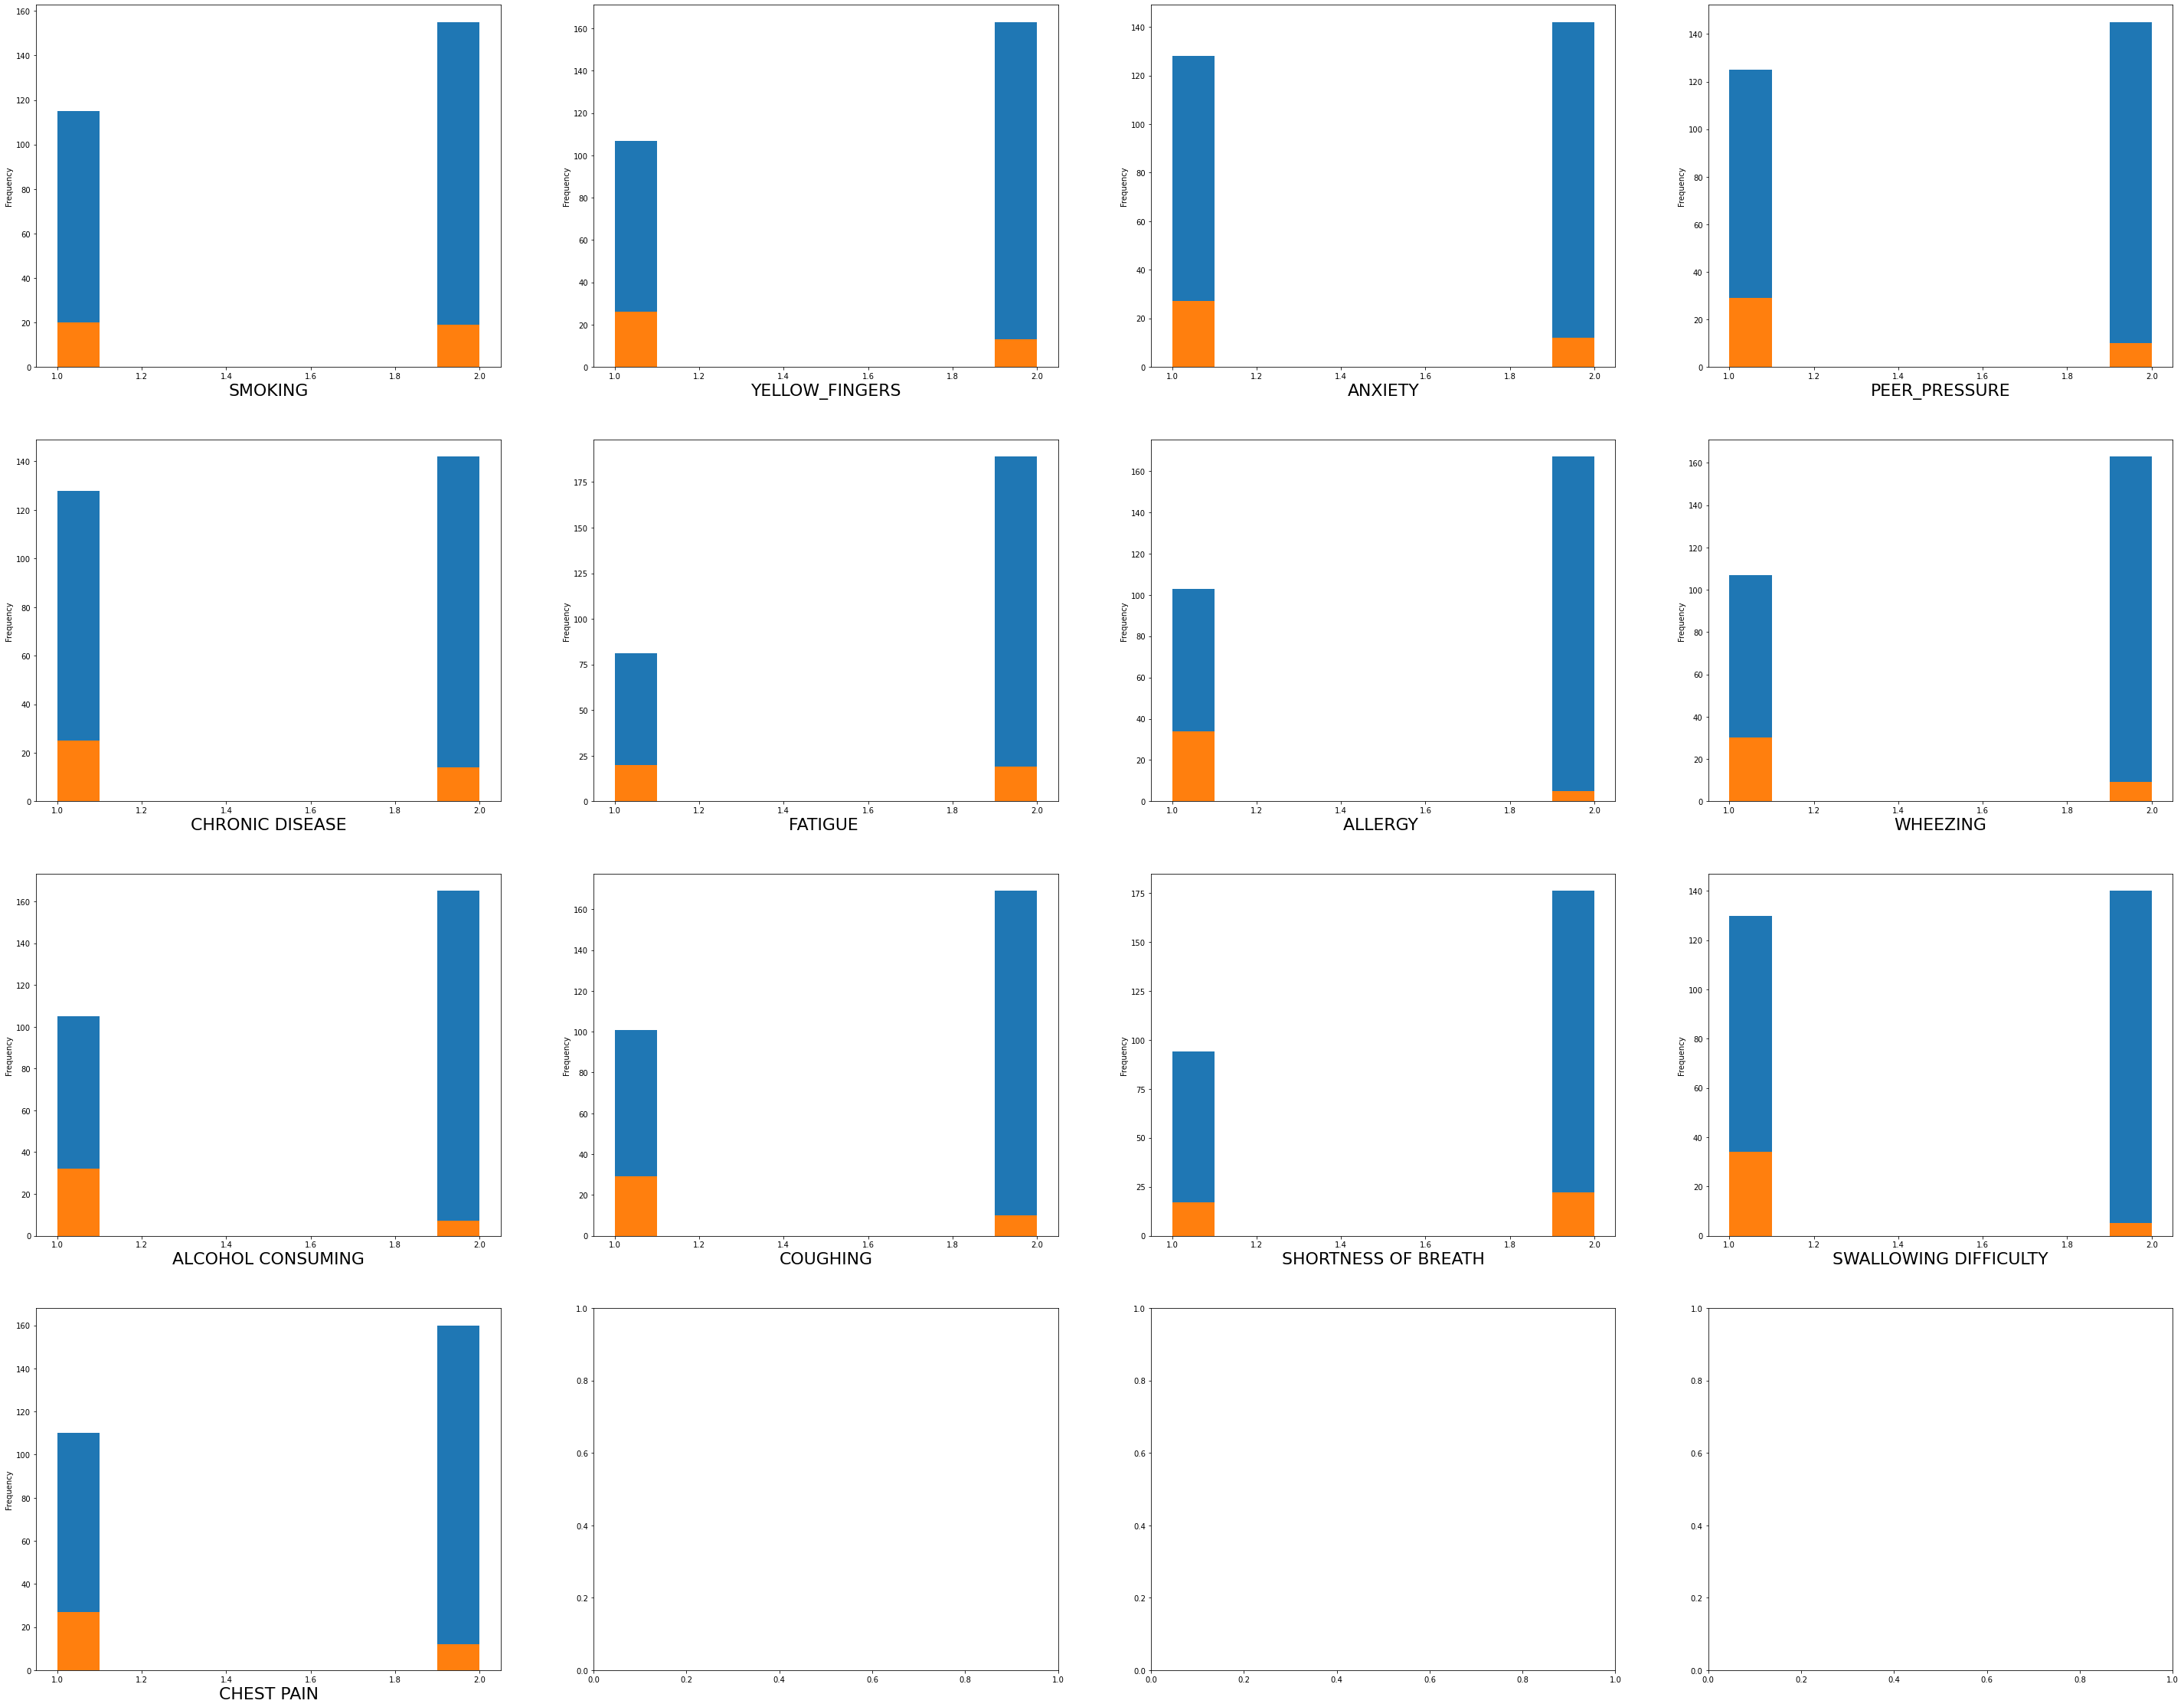

In [60]:
fig,ax = plt.subplots(4,4,figsize=(50,40))

for i in range(2,15):  
    a = df.loc[df['LUNG_CANCER'] == 'YES',df.columns[i]]
    b = df.loc[df['LUNG_CANCER'] == 'NO',df.columns[i]]
    a.plot.hist(ax=ax[(i-2)//4,(i-2)%4])
    b.plot.hist(ax=ax[(i-2)//4,(i-2)%4])
    ax[(i-2)//4,(i-2)%4].set_xlabel(df.columns[i],fontsize=22)

In [77]:
# Convert the values in gender and lung_cancer columns into int to calculate the correlation between the features.

df['GENDER']=df['GENDER'].map({'M':1,'F':0})
df['LUNG_CANCER']=df['LUNG_CANCER'].map({'YES':1,'NO':0})

In [81]:
df.corr()

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.133303  0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.064911 -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.078161 -0.001270  0.030718        0.345904  0.489403   
CHEST PAIN             0.362958 -0.018104  0.120117       -0.104829 -0.113634   
LUNG_CANCER            0.067254  0.089465  0.058179        0.181339  0.144947   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.275564        -0.204606 -0.083560  0.154251   
AGE                         0.018685        -0.012642  0.012614  0.027990   
SMOKING                    -0.042822        -0.141522 -0.029575  0.001913   
YELLOW_FINGERS              0.323083         0.041122 -0.118058 -0.144300   
ANXIETY                     0.216841        -0.009678 -0.188538 -0.165750   
PEER_PRESSURE               1.000000         0.048515  0.078148 -0.081800   
CHRONIC DISEASE             0.048515         1.000000 -0.110529  0.106386   
FATIGUE                     0.078148        -0.110529  1.000000  0.003056   
ALLERGY                    -0.081800         0.106386  0.003056  1.000000   
WHEEZING                   -0.068771        -0.049967  0.141937  0.173867   
ALCOHOL CONSUMING          -0.159973         0.002150 -0.191377  0.344339   
COUGHING                   -0.089019        -0.175287  0.146856  0.189524   
SHORTNESS OF BREATH        -0.220175        -0.026459  0.441745 -0.030056   
SWALLOWING DIFFICULTY       0.366590         0.075176 -0.132790 -0.061508   
CHEST PAIN                 -0.094828        -0.036938 -0.010832  0.239433   
LUNG_CANCER                 0.186388         0.110891  0.150673  0.327766   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.141207           0.454268  0.133303   
AGE                    0.055011           0.058985  0.169950   
SMOKING               -0.129426          -0.050623 -0.129471   
YELLOW_FINGERS        -0.078515          -0.289025 -0.012640   
ANXIETY               -0.191807          -0.165750 -0.225644   
PEER_PRESSURE         -0.068771          -0.159973 -0.089019   
CHRONIC DISEASE       -0.049967           0.002150 -0.175287   
FATIGUE                0.141937          -0.191377  0.146856   
ALLERGY                0.173867           0.344339  0.189524   
WHEEZING               1.000000           0.265659  0.374265   
ALCOHOL CONSUMING      0.265659           1.000000  0.202720   
COUGHING               0.374265           0.202720  1.000000   
SHORTNESS OF BREATH    0.037834          -0.179416  0.277385   
SWALLOWING DIFFICULTY  0.069027          -0.009294 -0.157586   
CHEST PAIN             0.147640           0.331226  0.083958   
LUNG_CANCER            0.249300           0.288533  0.248570   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                           -0.064911              -0.078161    0.362958   
AGE                              -0.017513              -0.001270   -0.018104   
SMOKI

### Machine Learning

*** 

The problem of making prediction about whether a person has lung cancer involves a supervised classification problem. Since the data contains mainly yes/no questions, I chose Random Forest which contains many decision trees as the model to perform the classification task. 

In [82]:
# Create the model and split the values into training sets and testing sets.

x = df.iloc[:,0:15]
y = df.iloc[:,15]

import sklearn.ensemble
rf_classifier = sklearn.ensemble.RandomForestClassifier(max_depth=15)

import sklearn.model_selection

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x, y, test_size=0.2, random_state=42)

In [83]:
# Scale the values.

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x_train_scaled=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_train_scaled

GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1.0  0.454545      1.0             0.0      0.0            0.0   
1       1.0  0.484848      0.0             0.0      0.0            0.0   
2       1.0  0.696970      0.0             1.0      0.0            0.0   
3       1.0  0.848485      0.0             1.0      0.0            1.0   
4       1.0  0.803030      1.0             0.0      0.0            0.0   
..      ...       ...      ...             ...      ...            ...   
242     1.0  0.666667      1.0             1.0      1.0            1.0   
243     0.0  0.681818      1.0             1.0      1.0            1.0   
244     0.0  0.606061      1.0             1.0      1.0            1.0   
245     0.0  0.742424      1.0             0.0      0.0            0.0   
246     1.0  0.651515      1.0             0.0      0.0            0.0   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                0.0       1.0       0.0       1.0                1.0   
1                1.0       1.0       1.0       0.0                1.0   
2                0.0       1.0       0.0       1.0                1.0   
3                0.0       1.0       1.0       1.0                1.0   
4                1.0       1.0       1.0       1.0                1.0   
..               ...       ...       ...       ...                ...   
242              1.0       0.0       0.0       0.0                0.0   
243              0.0       1.0       0.0       1.0                0.0   
244              1.0       1.0       0.0       0.0                0.0   
245              0.0       1.0       0.0       0.0                0.0   
246              0.0       1.0       1.0       1.0                1.0   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0         1.0                  1.0                    0.0         1.0  
1         0.0                  1.0                    0.0         1.0  
2         1.0                  1.0                    0.0         0.0  
3         1.0                  0.0                    0.0         0.0  
4         0.0                  0.0                    1.0         1.0  
..        ...                  ...                    ...         ...  
242       0.0                  0.0                    0.0         0.0  
243       1.0                  1.0                    1.0         0.0  
244       0.0                  1.0                    1.0         0.0  
245       0.0                  1.0                    0.0         0.0  
246       1.0                  1.0                    0.0         1.0  

[247 rows x 15 columns]

In [85]:
x_test_scaled = pd.DataFrame(scale.fit_transform(x_test),columns=x_test.columns)
x_test_scaled

GENDER       AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      0.0  0.459459      0.0             1.0      1.0            1.0   
1      1.0  0.243243      1.0             1.0      1.0            1.0   
2      1.0  0.783784      0.0             0.0      0.0            0.0   
3      1.0  0.702703      0.0             1.0      0.0            1.0   
4      1.0  0.567568      0.0             1.0      1.0            0.0   
..     ...       ...      ...             ...      ...            ...   
57     0.0  0.783784      1.0             1.0      1.0            0.0   
58     1.0  0.675676      0.0             1.0      1.0            0.0   
59     1.0  0.270270      1.0             0.0      0.0            0.0   
60     0.0  0.486486      1.0             0.0      0.0            1.0   
61     0.0  0.324324      0.0             0.0      1.0            1.0   

    CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0               0.0       0.0       1.0       1.0                0.0   
1               1.0       0.0       1.0       0.0                1.0   
2               1.0       0.0       1.0       0.0                1.0   
3               1.0       1.0       1.0       1.0                1.0   
4               0.0       1.0       0.0       1.0                1.0   
..              ...       ...       ...       ...                ...   
57              1.0       0.0       1.0       0.0                1.0   
58              0.0       0.0       0.0       1.0                1.0   
59              0.0       0.0       1.0       1.0                1.0   
60              0.0       1.0       1.0       1.0                1.0   
61              1.0       1.0       1.0       1.0                1.0   

    COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0        1.0                  0.0                    1.0         0.0  
1        0.0                  0.0                    1.0         1.0  
2        1.0                  1.0                    1.0         1.0  
3        1.0                  0.0                    1.0         1.0  
4        1.0                  1.0                    1.0         1.0  
..       ...                  ...                    ...         ...  
57       0.0                  0.0                    0.0         0.0  
58       1.0                  1.0                    1.0         0.0  
59       1.0                  0.0                    0.0         0.0  
60       1.0                  0.0                    1.0         1.0  
61       0.0                  1.0                    1.0         1.0  

[62 rows x 15 columns]

In [89]:
# Fit the values into the model.

rf_classifier.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=15)

In [94]:
# Predict the values in the test set.

y_pred = rf_classifier.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [95]:
# Evaluate the model.

from sklearn import metrics
print(f"Accuracy: {sklearn.metrics.accuracy_score(y_test, y_pred):.2%}")
print(f"Precision: {sklearn.metrics.precision_score(y_test, y_pred, average='micro'):.2%}")
print(f"Recall: {sklearn.metrics.recall_score(y_test, y_pred, average='micro'):.2%}")

Accuracy: 96.77%
Precision: 96.77%
Recall: 96.77%


In [96]:
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 0,  2],
       [ 0, 60]])